In [6]:
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [7]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("/", "_")


In [9]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
X=df.drop('math_score', axis=1)
y=df['math_score']

In [11]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [12]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [13]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns



In [14]:
cat_features


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [15]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [16]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
stand=StandardScaler()
on_encoder=OneHotEncoder()


In [18]:
processor=ColumnTransformer(
    [
        ('OneHotEncoder',on_encoder,cat_features),
        ('StandardScaler',stand,num_features)
    ]
)

In [19]:
X=processor.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
models={
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "SVR":SVR(),
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "CatBoostRegressor":CatBoostRegressor(),
    "XGBRegressor":XGBRegressor()
}

model_list=[]
r2_list=[]

In [22]:
import numpy as np

In [23]:
def evaluate_model(true,predict):
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    rmse=np.sqrt(mse)
    score=r2_score(true,predict)

    return mae,rmse,score

In [24]:
for i in range(len(list(models))):
    model=list(models.values())[i]

    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

    

KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7133
- Mean Absolute Error: 4.5217
- R2 Score: 0.8552
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2412
- Mean Absolute Error: 5.6110
- R2 Score: 0.7845


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.9887
- Mean Absolute Error: 6.4100
- R2 Score: 0.7377


RandomForestRegressor
Model performance for Training set
- Root Mean Squared Error: 2.2855
- Mean Absolute Error: 1.8122
- R2 Score: 0.9768
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9156
- Mean Absolute Error: 4.5472
- R2 Score: 0.8562


AdaBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7312
- Mean Absolute Error: 4.6619
- R2 Score: 

# Result

In [25]:
pd.DataFrame(zip(model_list,r2_list),columns=['model name','r2 score'])

,model name,r2 score
0,KNeighborsRegressor,0.784518
1,DecisionTreeRegressor,0.737731
2,RandomForestRegressor,0.856192
3,AdaBoostRegressor,0.852641
4,SVR,0.728600
5,LinearRegression,0.880433
6,Ridge,0.880593
7,CatBoostRegressor,0.851632
8,XGBRegressor,0.827797


becuse linear regressor giving best accuracy in this data set / problem so will use that

In [26]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred=lin.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.8804332983749565


In [27]:
import matplotlib.pyplot as plt

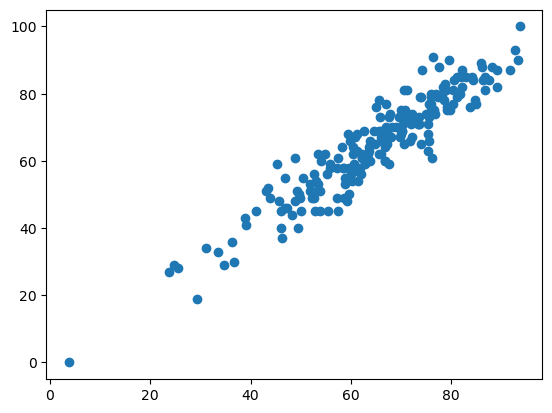

In [28]:
plt.scatter(y_pred,y_test)

### Diffrence between predicted value and real value

In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
